# Naive Bayes Classifier

# Lymphography Data Set

### This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. https://archive.ics.uci.edu/ml/datasets/Lymphography



In [4]:
import pandas as pd
import numpy as np
import math

Y_test_hat = []
Y_train_hat = []
train_set = []

train = pd.read_csv("train_set.csv")
test = pd.read_csv("test_set.csv")

train.head()

,lymphatics,block_of_affere,bl_of_lymph_c,bl_of_lymph_s,by_pass,extravasates,regeneration_of,early_uptake_in,lym_nodes_dimin,lym_nodes_enlar,changes_in_lym,defect_in_node,changes_in_node,changes_in_stru,special_forms,dislocation_of,exclusion_of_no,no_of_nodes_in,class
0,arched,yes,no,no,no,no,no,yes,1,4,round,lac_central,lacunar,stripped,vesicles,yes,yes,5,malign_lymph
1,displaced,yes,no,no,yes,yes,no,yes,1,3,round,lac_central,lacunar,diluted,vesicles,yes,yes,3,malign_lymph
2,arched,no,no,no,no,yes,no,yes,1,2,oval,lac_margin,lac_margin,drop_like,vesicles,no,yes,1,malign_lymph
3,arched,no,no,no,no,no,no,yes,1,2,oval,lac_central,lacunar,faint,vesicles,yes,yes,3,malign_lymph
4,deformed,no,no,no,no,no,no,no,1,2,oval,lac_central,lacunar,faint,chalices,yes,yes,1,malign_lymph


In [5]:
test.head()

,lymphatics,block_of_affere,bl_of_lymph_c,bl_of_lymph_s,by_pass,extravasates,regeneration_of,early_uptake_in,lym_nodes_dimin,lym_nodes_enlar,changes_in_lym,defect_in_node,changes_in_node,changes_in_stru,special_forms,dislocation_of,exclusion_of_no,no_of_nodes_in,class
0,displaced,no,no,no,no,yes,no,yes,1,4,oval,lacunar,lac_central,stripped,vesicles,yes,yes,2,malign_lymph
1,arched,no,no,no,no,yes,no,yes,1,2,oval,lacunar,lac_central,faint,no,yes,yes,2,malign_lymph
2,displaced,yes,yes,yes,yes,yes,yes,yes,1,4,round,lac_central,lac_central,stripped,vesicles,yes,yes,8,malign_lymph
3,displaced,yes,yes,no,yes,yes,no,yes,1,1,oval,lacunar,no,drop_like,no,yes,yes,2,malign_lymph
4,deformed,no,no,no,no,yes,no,yes,1,2,oval,lac_central,lac_margin,faint,chalices,yes,yes,1,malign_lymph


In [23]:
def NaiveBayes(train_set_file, test_set_file):
        
    Y_test_hat = []
    Y_train_hat = []
    X_train = pd.DataFrame()
    
    ########################################################### Data Preparation ##############################################################
    train = pd.read_csv(train_set_file)
    test = pd.read_csv(test_set_file)

    train.iloc[:, 8]= train.iloc[:, 8].astype('float64')
    train.iloc[:, 9]= train.iloc[:, 9].astype('float64')
    train.iloc[:, 17]= train.iloc[:, 17].astype('float64')

    test.iloc[:, 8]= test.iloc[:, 8].astype('float64')
    test.iloc[:, 9]= test.iloc[:, 9].astype('float64')
    test.iloc[:, 17]= test.iloc[:, 17].astype('float64')

    if(len(train_set) == 0):                                     #take data from train dataset
        X_train = train.copy()
        X_train = X_train.drop('class', axis=1)
        Y_train = train[['class']].copy()
    else:        
        for i in train_set:                                      #take data from train dataset based on custom train set size
            X_train = X_train.append(train[train.index == i], ignore_index = True)
        
        Y_train = X_train[['class']].copy()
        train = X_train.copy()
        X_train = X_train.drop('class', axis=1)
                
    X_test = test.copy()
    X_test = X_test.drop('class', axis=1)
    Y_test = test[['class']].copy()    
    
    ########################################################### Test Accuracy #################################################################
    columns = list(X_test)
    
    for l in range(0, X_test.shape[0]):
        
        #for Class: malign_lymph
        p_X_C_malign_lymph = 1                                    
        c = 'malign_lymph'

        for m in columns:
            if(m != 'lym_nodes_dimin' and m != 'lym_nodes_enlar' and m != 'no_of_nodes_in'):
                p_X_C_malign_lymph *= prob_cat(X_train, Y_train, X_test[m][l], c, m)      #for categorical variable     P(X|C = malign_lymph)
            else:
                p_X_C_malign_lymph *= prob_num(X_train, train, X_test[m][l], c, m)        #for numerical variable       P(X|C = malign_lymph)
                        
        #for Class: metastases
        p_X_C_metastases = 1
        c = 'metastases'

        for m in columns:
            if(m != 'lym_nodes_dimin' and m != 'lym_nodes_enlar' and m != 'no_of_nodes_in'):
                p_X_C_metastases *= prob_cat(X_train, Y_train, X_test[m][l], c, m)       #for categorical variable
            else:
                p_X_C_metastases *= prob_num(X_train, train, X_test[m][l], c, m)         #for numerical variable                  
        
        if (p_X_C_malign_lymph > p_X_C_metastases):
            Y_test_hat.append('malign_lymph')
            
            if(len(train_set) == 0):
                print(str(l + 1) + ". Predicted Class: malign_lymph      Actual Class: " + Y_test['class'][l] + "        Posterior Probability of malign_lymph: " + str(p_X_C_malign_lymph))
        else:
            Y_test_hat.append('metastases')
            
            if(len(train_set) == 0):
                print(str(l + 1) + ". Predicted Class: metastases        Actual Class: " + Y_test['class'][l] + "        Posterior Probability of metastases: " + str(p_X_C_metastases))
    
    count = 0
    for i in range(0, Y_test.shape[0]):
        if(Y_test['class'][i] == Y_test_hat[i]):
            count += 1
        
    if(len(train_set) == 0):
        print()
        print("Correct Classification: " + str(count) + " out of " + str(len(Y_test)))
    
    test_accuracy = count / Y_test.shape[0]
    
    ############################################################################################################################################
    
    ########################################################### Train Accuracy #################################################################
    columns = list(X_train)
    
    for l in range(0, X_train.shape[0]):
        
        #for Class: malign_lymph
        p_X_C_malign_lymph = 1                                 
        c = 'malign_lymph'

        for m in columns:
            if(m != 'lym_nodes_dimin' and m != 'lym_nodes_enlar' and m != 'no_of_nodes_in'):
                p_X_C_malign_lymph *= prob_cat(X_train, Y_train, X_train[m][l], c, m)      #for categorical variable
            else:
                p_X_C_malign_lymph *= prob_num(X_train, train, X_train[m][l], c, m)        #for numerical variable
                        
        #for Class: metastases
        p_X_C_metastases = 1
        c = 'metastases'

        for m in columns:
            if(m != 'lym_nodes_dimin' and m != 'lym_nodes_enlar' and m != 'no_of_nodes_in'):
                p_X_C_metastases *= prob_cat(X_train, Y_train, X_train[m][l], c, m)      #for categorical variable
            else:
                p_X_C_metastases *= prob_num(X_train, train, X_train[m][l], c, m)        #for numerical variable                  
        
        if (p_X_C_malign_lymph > p_X_C_metastases):
            Y_train_hat.append('malign_lymph')            
        else:
            Y_train_hat.append('metastases')
            
    count = 0
    for i in range(0, Y_train.shape[0]):
        if(Y_train['class'][i] == Y_train_hat[i]):
            count += 1
        
    train_accuracy = count / Y_train.shape[0]
    
    ############################################################################################################################################
    
    return round(train_accuracy, 3), round(test_accuracy, 3)

def prob_cat(X_train, Y_train, X, C, i):    
    X_count = 0
    C_count_for_X = 0
    C_count = 0
    
    for j in range(0, X_train.shape[0]):
        try:
            if (Y_train['class'][j] == C):
                C_count += 1
        except:
            pass
    
    p_C = (C_count + 1) / (X_train.shape[0] + (1 * len(X_train[i].unique())))    #Laplace Smoothing is used to smooth categorical data
        
    for j in range(0, X_train.shape[0]):
        try:
            if (X == X_train[i][j]):
                X_count += 1
        except:
            pass
            
    p_X = (X_count + 1) / (X_train.shape[0] + (1 * len(X_train[i].unique())))    #Laplace Smoothing is used to smooth categorical data
            
    for j in range(0, X_train.shape[0]):
        try:
            if (X == X_train[i][j] and Y_train['class'][j] == C):
                C_count_for_X += 1
        except:
            pass
                
    p_C_X = (C_count_for_X + 1) / (X_count + (1 * len(X_train[i].unique())))    #Laplace Smoothing is used to smooth categorical data   
    p_X_C = p_C_X * p_X / p_C                        
            
    return p_X_C

def prob_num(X_train, train, X, C, i):
    mu = np.zeros(X_train.columns.size, dtype="float64")    
    train_c = train[train.iloc[:, 18] == C]
    train_c = train_c.drop('class', axis=1)
    N = 1
    
    if(len(train_c) == 0):
        p_X_C = 0                                                               #when the train data doesn’t have the expected class. set to the lowest probability
    else:
        for j in range(0, train_c.columns.size):
            if(train_c.iloc[:, j].dtype == 'float64'):
                mu[j] = sum(train_c.iloc[:, j]) / len(train_c)
        
        try:
            value = float(X)            
            temp1 = pow((value - mu[train_c.columns.get_loc(i)]), 2)            
            sigma_sqr = pow((value - mu[train_c.columns.get_loc(i)]), 2) / N    
            
            if(temp1 == 0 and sigma_sqr == 0):
                p_X_C = 1                                                       #neutral probability in case of 0 varience
            else:
                temp2 = temp1 / (2 * sigma_sqr)
                temp2 = math.exp(-temp2)            
                temp3 = math.sqrt(2 * math.pi * sigma_sqr)
            
                p_X_C = temp2 / temp3            
        except:            
            pass
    
    return p_X_C


In [24]:
train_set = []
train_set_file = 'train_set.csv'
test_set_file = 'test_set.csv'

train_accuracy, test_accuracy = NaiveBayes(train_set_file, test_set_file)

print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

1. Predicted Class: malign_lymph      Actual Class: malign_lymph        Posterior Probability of malign_lymph: 3.61714484294199e-05
2. Predicted Class: malign_lymph      Actual Class: malign_lymph        Posterior Probability of malign_lymph: 6.48277222669016e-05
3. Predicted Class: malign_lymph      Actual Class: malign_lymph        Posterior Probability of malign_lymph: 1.399817271017032e-10
4. Predicted Class: metastases        Actual Class: malign_lymph        Posterior Probability of metastases: 1.8884748131362263e-07
5. Predicted Class: metastases        Actual Class: malign_lymph        Posterior Probability of metastases: 0.00020459083868682576
6. Predicted Class: malign_lymph      Actual Class: malign_lymph        Posterior Probability of malign_lymph: 0.00038306234948415726
7. Predicted Class: malign_lymph      Actual Class: malign_lymph        Posterior Probability of malign_lymph: 0.0023445415762459853
8. Predicted Class: malign_lymph      Actual Class: malign_lymph        

## – Plot a learning curve for both methods.
## – Plot points for training set sizes of 25, 50, and 100 instances.
##       - For each training-set size, randomly draw 4 different training sets and evaluate each resulting
##         model on the test set.
##       - For each training set size, ploted the average test-set accuracy. Be sure to label the axes of your plot.

In [28]:
import random

train_set_file = 'train_set.csv'
test_set_file = 'test_set.csv'

train_sizes = [25, 50, 100]          #train set size
avg_train_accuracy = []
avg_test_accuracy = []
train_acc = []
test_acc = []
train_set = []

for s in train_sizes:
    accuracy = []
    train_sets = []
                                                                                     #randomly selecting 4 different train sets for each train size
    train_sets.append(random.sample(range(0, 100), s))
    train_sets.append(random.sample(range(0, 100), s))
    train_sets.append(random.sample(range(0, 100), s))
    train_sets.append(random.sample(range(0, 100), s))
    
    for j in range(0, len(train_sets)):
        train_set = train_sets[j]
        train_accuracy, test_accuracy = NaiveBayes(train_set_file, test_set_file)    #evaluation results of 4 different train sets against test dataset
        train_acc.append(train_accuracy)
        test_acc.append(test_accuracy)
        
    print("Train Size: " + str(s) + "   Average Train Accuracy: " + str(round(sum(train_acc) / len(train_acc), 3)) + "   Average Test Accuracy: " + str(round(sum(test_acc) / len(test_acc), 3)))
    avg_train_accuracy.append(round(sum(train_acc) / len(train_acc), 3))             #average train accuracy
    avg_test_accuracy.append(round(sum(test_acc) / len(test_acc), 3))                #average test accuracy

Train Size: 25   Average Train Accuracy: 0.93   Average Test Accuracy: 0.821
Train Size: 50   Average Train Accuracy: 0.908   Average Test Accuracy: 0.827
Train Size: 100   Average Train Accuracy: 0.898   Average Test Accuracy: 0.837


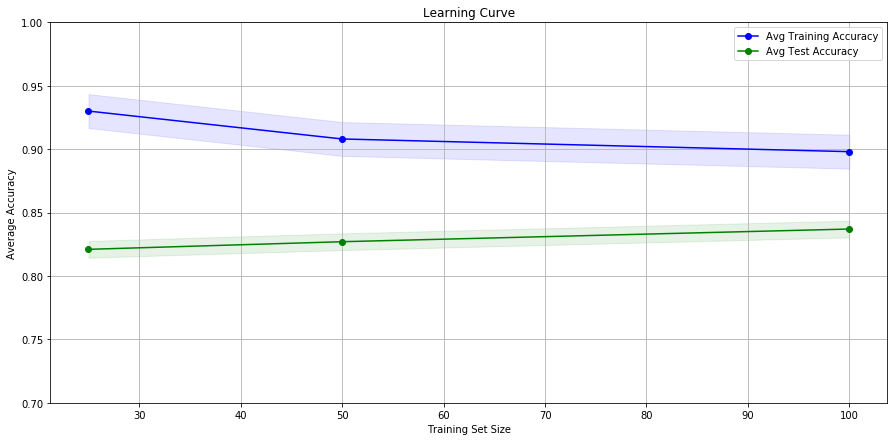

In [34]:
#plot learning curves
import matplotlib.pyplot as plt

train_acc_std = np.std(avg_train_accuracy)
test_acc_std = np.std(avg_test_accuracy)

plt.figure(figsize=(15, 7))
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Average Accuracy")
plt.fill_between(train_sizes, avg_train_accuracy - train_acc_std, avg_train_accuracy + train_acc_std, alpha=0.1, color="b")
plt.fill_between(train_sizes, avg_test_accuracy - test_acc_std, avg_test_accuracy + test_acc_std, alpha=0.1, color="g")
plt.plot(train_sizes, avg_train_accuracy, 'o-', color="b", label="Avg Training Accuracy")
plt.plot(train_sizes, avg_test_accuracy, 'o-', color="g", label="Avg Test Accuracy")
plt.legend()
plt.ylim(0.7, 1)
plt.grid()

## – Finally, compare the performance of your implementation against sklearn implementation of naive Bayes, e.g., use from sklearn.naivebayes import GaussianNB and report your findings on paper

In [35]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
import pandas as pd

def Gaussian_NB(train_set_file, test_set_file):
    
    X_train = pd.DataFrame()
    
    ########################################################### Data Preparation ##################################################
    train = pd.read_csv(train_set_file)
    test = pd.read_csv(test_set_file)

    train.iloc[:, 8]= train.iloc[:, 8].astype('float64')
    train.iloc[:, 9]= train.iloc[:, 9].astype('float64')
    train.iloc[:, 17]= train.iloc[:, 17].astype('float64')

    test.iloc[:, 8]= test.iloc[:, 8].astype('float64')
    test.iloc[:, 9]= test.iloc[:, 9].astype('float64')
    test.iloc[:, 17]= test.iloc[:, 17].astype('float64')

    if(len(train_set) == 0):                                     #take data from train dataset
        X_train = train.copy()
        X_train = X_train.drop('class', axis=1)
        Y_train = train[['class']].copy()
    else:        
        for i in train_set:                                      #take data from train dataset based on custom train set size
            X_train = X_train.append(train[train.index == i], ignore_index = True)
        
        Y_train = X_train[['class']].copy()
        train = X_train.copy()
        X_train = X_train.drop('class', axis=1)
        
    X_test = test.copy()
    X_test = X_test.drop('class', axis=1)
    Y_test = test[['class']].copy()
    ##############################################################################################################################
    
    columns = list(X_test)

    en = preprocessing.LabelEncoder()

    for m in columns:
        X_train[m] = en.fit_transform(X_train[m])               #transform data using Label Encoder
        X_test[m] = en.fit_transform(X_test[m])
    
    Y_train['class'] = en.fit_transform(Y_train['class'])
    y_train = []
    for i in range(0, len(Y_train)):
        y_train.append(Y_train['class'][i])                     #convert to a list
        
    Y_test['class'] = en.fit_transform(Y_test['class'])
    y_test = []
    for i in range(0, len(Y_test)):
        y_test.append(Y_test['class'][i])                       #convert to a list

    ############################# Gaussian Naive Bayes ##############################
    nb = GaussianNB()
    nb.fit(X_train, y_train)

    ############################# Train Accuracy ####################################
    y_pred = nb.predict(X_train)
    train_accuracy = metrics.accuracy_score(y_train, y_pred)
    
    if(len(train_set) == 0): print("Train Accuracy: ", train_accuracy)
    if(len(train_set) == 0): print(metrics.classification_report(y_train, y_pred))    
    if(len(train_set) == 0): print()
    ############################# Test Accuracy ####################################
    y_pred = nb.predict(X_test)
    test_accuracy = metrics.accuracy_score(y_test, y_pred)
    
    if(len(train_set) == 0): print("Test Accuracy: ", test_accuracy)
    if(len(train_set) == 0): print(metrics.classification_report(y_test, y_pred))
    ################################################################################
    
    return train_accuracy, test_accuracy

In [36]:
train_set_file = 'train_set.csv'
test_set_file = 'test_set.csv'
train_set = []

Gaussian_NB(train_set_file, test_set_file)

Train Accuracy:  0.81
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        43
           1       0.82      0.86      0.84        57

    accuracy                           0.81       100
   macro avg       0.81      0.80      0.80       100
weighted avg       0.81      0.81      0.81       100


Test Accuracy:  0.8809523809523809
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        18
           1       0.83      1.00      0.91        24

    accuracy                           0.88        42
   macro avg       0.91      0.86      0.87        42
weighted avg       0.90      0.88      0.88        42



(0.81, 0.8809523809523809)

In [59]:
import random

train_set_file = 'train_set.csv'
test_set_file = 'test_set.csv'

train_sizes = [25, 50, 100]             #train set sizes
avg_train_accuracy = []
avg_test_accuracy = []
train_acc = []
test_acc = []
train_set = []

for s in train_sizes:
    accuracy = []
    train_sets = []
                                                                                     #randomly selecting 4 different train sets for each train size
    train_sets.append(random.sample(range(0, 100), s))
    train_sets.append(random.sample(range(0, 100), s))
    train_sets.append(random.sample(range(0, 100), s))
    train_sets.append(random.sample(range(0, 100), s))
    
    for j in range(0, len(train_sets)):
        train_set = train_sets[j]
        train_accuracy, test_accuracy = Gaussian_NB(train_set_file, test_set_file)    #evaluation results of 4 different train sets against test dataset
        train_acc.append(train_accuracy)
        test_acc.append(test_accuracy)
        
    print("Train Size: " + str(s) + "   Average Train Accuracy: " + str(round(sum(train_acc) / len(train_acc), 3)) + "   Average Test Accuracy: " + str(round(sum(test_acc) / len(test_acc), 3)))
    avg_train_accuracy.append(round(sum(train_acc) / len(train_acc), 3))              #average train accuracy
    avg_test_accuracy.append(round(sum(test_acc) / len(test_acc), 3))                 #average test accuracy

Train Size: 25   Average Train Accuracy: 0.83   Average Test Accuracy: 0.75
Train Size: 50   Average Train Accuracy: 0.823   Average Test Accuracy: 0.78
Train Size: 100   Average Train Accuracy: 0.818   Average Test Accuracy: 0.813


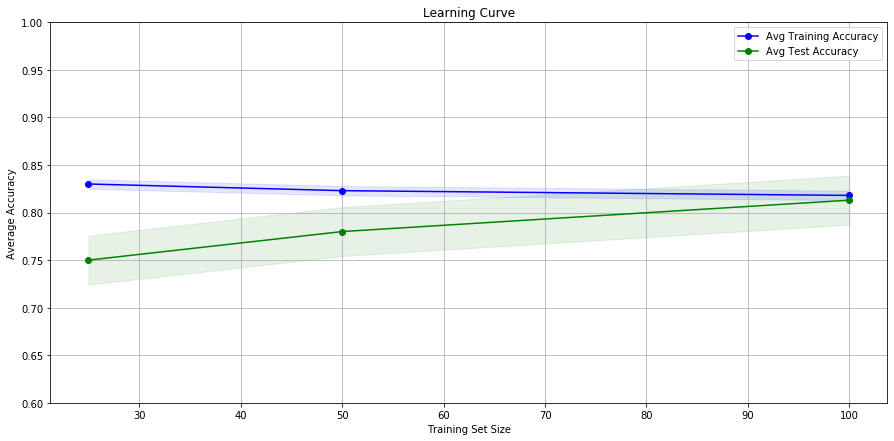

In [62]:
#plot learning curves
import matplotlib.pyplot as plt

train_acc_std = np.std(avg_train_accuracy)
test_acc_std = np.std(avg_test_accuracy)

plt.figure(figsize=(15, 7))
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Average Accuracy")
plt.fill_between(train_sizes, avg_train_accuracy - train_acc_std, avg_train_accuracy + train_acc_std, alpha=0.1, color="b")
plt.fill_between(train_sizes, avg_test_accuracy - test_acc_std, avg_test_accuracy + test_acc_std, alpha=0.1, color="g")
plt.plot(train_sizes, avg_train_accuracy, 'o-', color="b", label="Avg Training Accuracy")
plt.plot(train_sizes, avg_test_accuracy, 'o-', color="g", label="Avg Test Accuracy")
plt.legend()
plt.ylim(0.6, 1)
plt.grid()